# Loading ONT data

In [1]:
import poreflow as pf

from utils import get_tmp_file, remove_tmp_file

Here we use a small Fast5 file used in the module tests. 
Using `get_tmp_file` we create copy in a temporary directory
we can freely edit.

In [2]:
fname = get_tmp_file("../tests/assets/ont_measurement.fast5")
fname.as_posix()

'tmp_8jd2a3a2/ont_measurement.fast5'

## Default opening

In [3]:
f = pf.File(fname)  # Open file

print(f"Channels: {f.channels}")  # Check available channels
print(f"Sampling rate: {f.sfreq} Hz")

Channels: [19, 20]
Sampling rate: 5000.0 Hz


In [4]:
raw = f.get_raw(19)

f.close()  # Don't forget to close file

raw

,i,v
0,15.184121,0
1,14.514233,0
2,13.621050,0
3,12.057979,0
4,13.174458,0
...,...,...
9007291,0.223296,0
9007292,0.223296,0
9007293,-0.223296,0
9007294,0.893184,0


## Opening using a context manager (recommended)

File: <HDF5 file "ont_measurement.fast5" (mode r)>
File: <Closed HDF5 file>


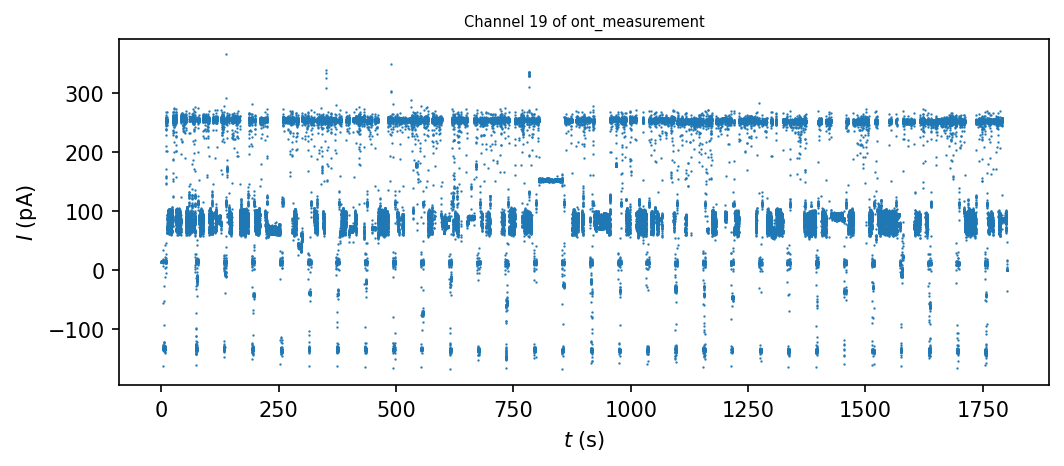

In [5]:
with pf.File(fname) as f:
    print(f"File: {f}")
    raw = f.get_raw(19)

raw.plot()

print(f"File: {f}")

## Opening in write mode
By default, the file is opened in read-only mode. When performing actions like finding events or steps, the data
is automatically saved to the Fast5 file. This means that the file has to be opened in write mode. This can be done using the argument `mode="r+"` or simply:

In [6]:
with pf.File(fname, "r+") as f:
    print(f"Has events? {f.has_events} \n\nStarting event detection...", end="")

    open_state_range = (200, 300)
    voltage_range = (175, 185)
    f.find_events(open_state_range, voltage_range, closing_iterations=10, verbose=0)

    print(f"Done. \n\nHas events? {f.has_events}")

    events = f.events

Has events? False 

Starting event detection...Done. 

Has events? True


In [7]:
events

,start_idx,end_idx,n_pts,start_time,end_time,duration,ios,channel,quality,label
0,5,46363,46358,0.0010,9.2726,9.2716,256.573649,19,0.0,0
1,59602,118670,59068,11.9204,23.7340,11.8136,256.556858,19,0.0,0
2,153648,205506,51858,30.7296,41.1012,10.3716,256.533831,19,0.0,0
3,259337,298494,39157,51.8674,59.6988,7.8314,256.508538,19,0.0,0
4,303058,323739,20681,60.6116,64.7478,4.1362,256.499759,19,0.0,0
...,...,...,...,...,...,...,...,...,...,...
290,8769577,8798179,28602,1753.9154,1759.6358,5.7204,249.527135,20,0.0,0
291,8831443,8832459,1016,1766.2886,1766.4918,0.2032,249.523425,20,0.0,0
292,8863121,8865628,2507,1772.6242,1773.1256,0.5014,249.520923,20,0.0,0
293,8911185,8950712,39527,1782.2370,1790.1424,7.9054,249.515785,20,0.0,0


Cleanup of temporary data

In [8]:
remove_tmp_file()